
# Options Program 1 

In [1]:
# upload models and shit
from random import randint
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Download the Data

In [2]:
data2004 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2004.csv')
data2005 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2005.csv')
data2006 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2006.csv')
data2007 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2007.csv')
data2008 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2008.csv')
data2009 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2009.csv')
data2010 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2010.csv')
data2012 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2012.csv')
data2013 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2013.csv')
data2014 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2014.csv')
data2015 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2015.csv')
data2016 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2016.csv')
data2017 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2017.csv')
data2018 = pd.read_csv('../options_program/UnderlyingOptionsEODQuotes_2018.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Plot Data to Visualize 

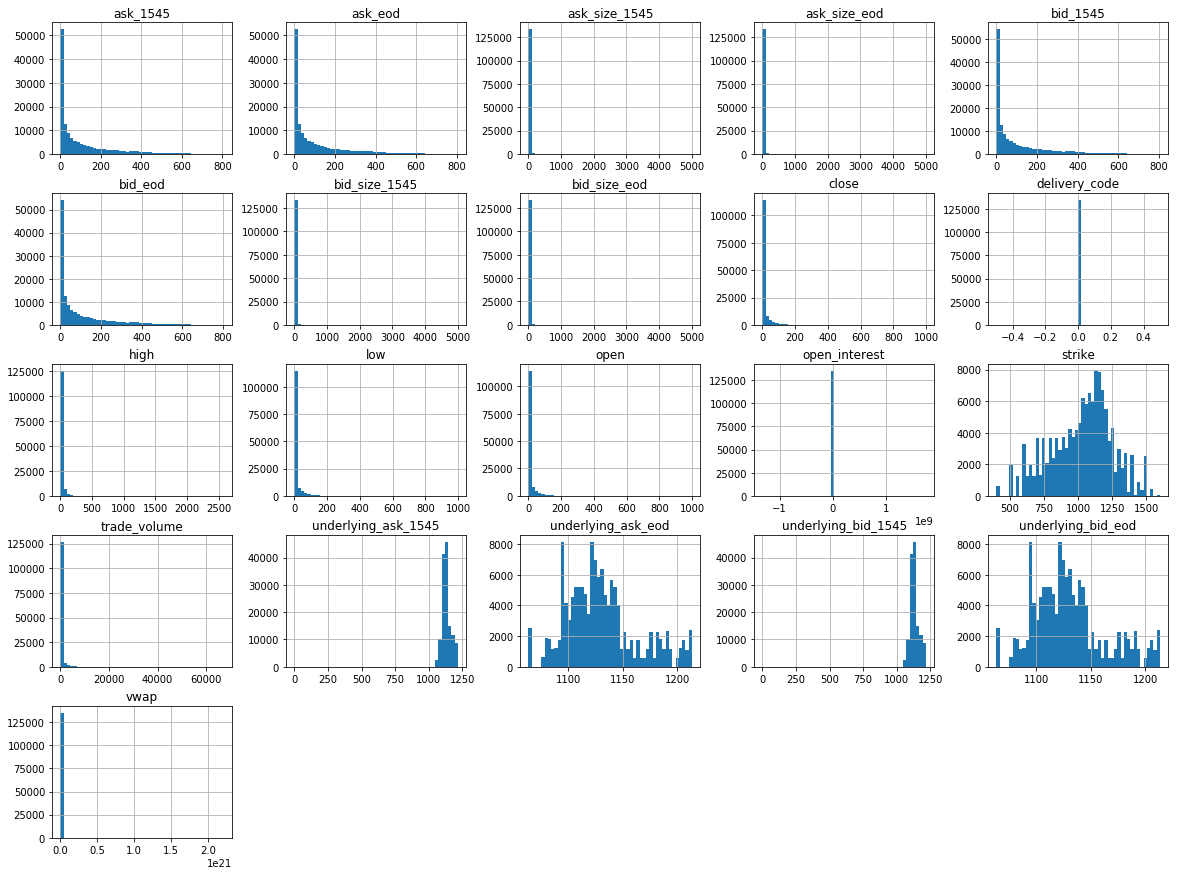

In [3]:
data2004.hist(bins = 50, figsize = (20,15))
plt.show()

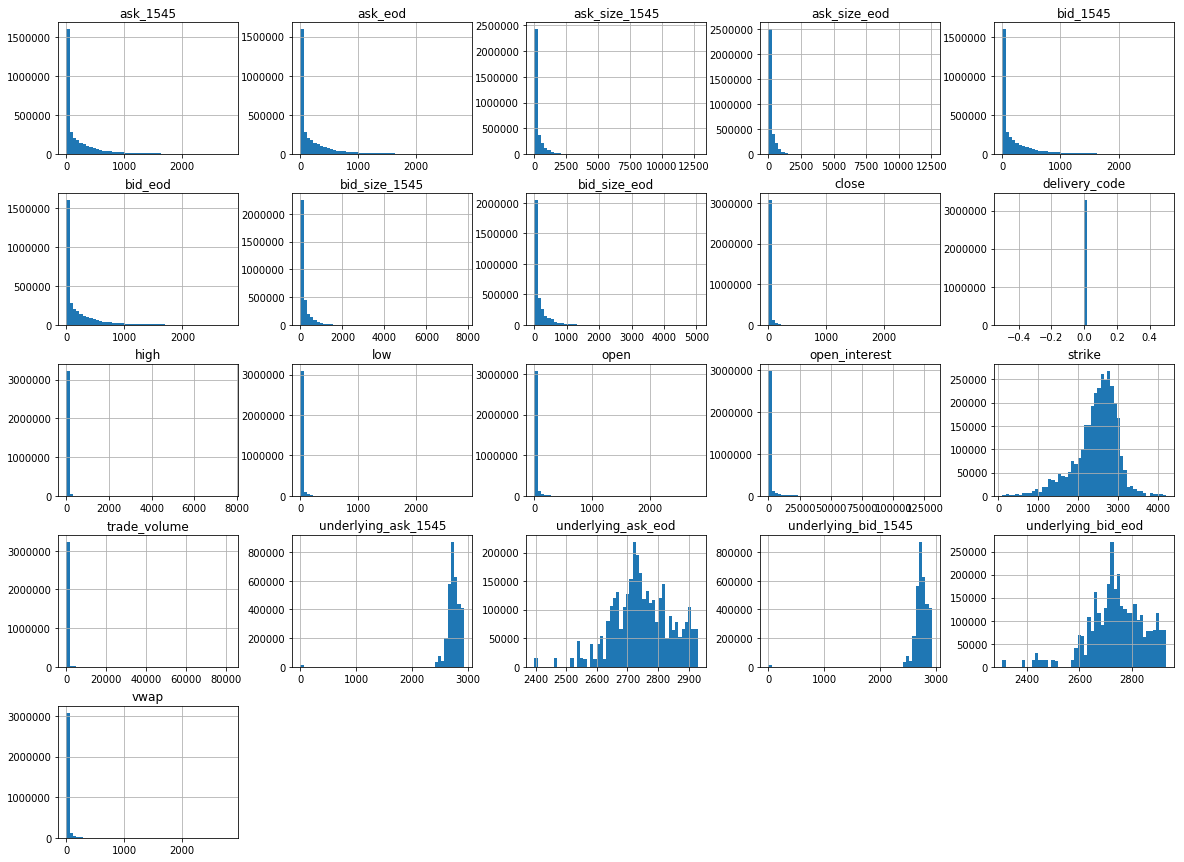

In [4]:
data2018.hist(bins = 50, figsize = (20,15))
plt.show()

In [5]:
data = [data2004, data2005, data2006, data2007, data2008, data2009, data2010, data2012, data2013, data2014, data2015, data2016, data2017, data2018]

### Specify data columns to be cut

In [6]:
for i in data:
    i['expiration'] = pd.to_datetime(i['expiration'])
    i['quote_date'] = pd.to_datetime(i['quote_date'])
    i['days_to_exp'] = i["expiration"].sub(i["quote_date"], axis = 0)
    i['days_to_exp'] = i['days_to_exp'] / np.timedelta64(1, 'D')
    i['days_to_esp'] = i['days_to_exp'] / 365
    i['moneyness'] = i['strike'] / ((i['underlying_bid_eod'] + i['underlying_ask_eod'])/2)
    i['option_premium'] = (i['ask_eod'] + i['bid_eod']) / 2

### concat all the data into a single dataframe for next step in feature engineering

In [7]:
x = pd.concat([data2004, data2005, data2006, data2007,data2008, data2009, data2010, data2012, data2013, data2014, data2015, data2016, data2017, data2018])

In [8]:
data2016.head()

,underlying_symbol,quote_date,root,expiration,strike,option_type,open,high,low,close,...,ask_eod,underlying_bid_eod,underlying_ask_eod,vwap,open_interest,delivery_code,days_to_exp,days_to_esp,moneyness,option_premium
0,^SPX,2016-12-30,SPXW,2016-12-30,300.0,c,0.0,0.0,0.0,0.0,...,1952.20,2238.83,2238.83,0.0,1,0,0.0,0.0,0.133999,1941.400
1,^SPX,2016-12-30,SPXW,2016-12-30,300.0,p,0.0,0.0,0.0,0.0,...,0.05,2238.83,2238.83,0.0,320,0,0.0,0.0,0.133999,0.025
2,^SPX,2016-12-30,SPXW,2016-12-30,400.0,c,0.0,0.0,0.0,0.0,...,1852.20,2238.83,2238.83,0.0,0,0,0.0,0.0,0.178665,1841.400
3,^SPX,2016-12-30,SPXW,2016-12-30,400.0,p,0.0,0.0,0.0,0.0,...,0.05,2238.83,2238.83,0.0,511,0,0.0,0.0,0.178665,0.025
4,^SPX,2016-12-30,SPXW,2016-12-30,500.0,c,0.0,0.0,0.0,0.0,...,1752.20,2238.83,2238.83,0.0,0,0,0.0,0.0,0.223331,1741.400


### Import Volatility Data 

In [9]:
VIXALL = pd.read_csv('../options_program/VIXALL.csv')

In [10]:
VIXALL = VIXALL.drop(VIXALL[(VIXALL['VIXCLS']=='.')].index)
VIXALL.dropna(axis=1, how = 'all')
VIXALL['DATE'] = pd.to_datetime(VIXALL['DATE'])
VIXALL['VIXCLS'] = pd.to_numeric(VIXALL['VIXCLS'])
VIXALL.columns = ['quote_date', 'VIXCLS']
VIXALL.head()

,quote_date,VIXCLS
0,2004-01-02,18.22
1,2004-01-05,17.49
2,2004-01-06,16.73
3,2004-01-07,15.50
4,2004-01-08,15.61


### Merge Data to use in NN 

In [11]:
x = pd.merge(x, VIXALL, how = 'outer', on = 'quote_date')
x['ask_eod'].replace('', np.nan, inplace=True)
x.dropna(subset = ['ask_eod'], inplace = True)
x = x.drop(x[(x['open_interest']==0) | (x['ask_eod']==0) | (x['bid_eod'] ==0) | (x['trade_volume'] == 0)].index)
x.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3549537 entries, 27 to 14511533
Data columns (total 31 columns):
underlying_symbol      object
quote_date             datetime64[ns]
root                   object
expiration             datetime64[ns]
strike                 float64
option_type            object
open                   float64
high                   float64
low                    float64
close                  float64
trade_volume           float64
bid_size_1545          float64
bid_1545               float64
ask_size_1545          float64
ask_1545               float64
underlying_bid_1545    float64
underlying_ask_1545    float64
bid_size_eod           float64
bid_eod                float64
ask_size_eod           float64
ask_eod                float64
underlying_bid_eod     float64
underlying_ask_eod     float64
vwap                   float64
open_interest          float64
delivery_code          object
days_to_exp            float64
days_to_esp            float64
moneyne

### Import Libor Data To be Used in Black Scholes

In [12]:
Libor = pd.read_csv('../options_program/Libor.csv')

In [13]:
Libor = Libor.drop(Libor[(Libor['USD1MTD156N']=='.')].index)
Libor.dropna(axis=1, how = 'all')
Libor['DATE'] = pd.to_datetime(Libor['DATE'])
Libor['USD1MTD156N'] = pd.to_numeric(Libor['USD1MTD156N'])
Libor.columns = ['quote_date', 'risk_free_rate']
Libor.head()

,quote_date,risk_free_rate
0,2004-01-02,1.12
1,2004-01-05,1.12
2,2004-01-06,1.12
3,2004-01-07,1.11
4,2004-01-08,1.11


In [14]:
#df0 = pd.DataFrame()
#df1 = pd.DataFrame()
#df2 = pd.Dataframe()
#df3 = pd.Dataframe()
x = pd.merge(x, Libor, how = 'outer', on = 'quote_date')
x['ask_eod'].replace('', np.nan, inplace=True)
x.dropna(subset = ['ask_eod'], inplace = True)
x = x.drop(x[(x['open_interest']==0) | (x['ask_eod']==0) | (x['bid_eod'] ==0) | (x['trade_volume'] == 0)].index)


In [15]:
x.head()

,underlying_symbol,quote_date,root,expiration,strike,option_type,open,high,low,close,...,underlying_ask_eod,vwap,open_interest,delivery_code,days_to_exp,days_to_esp,moneyness,option_premium,VIXCLS,risk_free_rate
0,^SPX,2004-12-31,SXB,2005-01-22,995.0,p,0.1,0.15,0.1,0.15,...,1211.92,0.10,22205.0,0,22.0,0.060274,0.821011,0.125,13.29,2.4
1,^SPX,2004-12-31,SPQ,2005-01-22,1025.0,p,0.2,0.20,0.2,0.20,...,1211.92,0.20,20866.0,0,22.0,0.060274,0.845765,0.325,13.29,2.4
2,^SPX,2004-12-31,SPQ,2005-01-22,1050.0,p,0.3,0.35,0.3,0.35,...,1211.92,0.35,32201.0,0,22.0,0.060274,0.866394,0.225,13.29,2.4
3,^SPX,2004-12-31,SPQ,2005-01-22,1075.0,p,0.3,0.40,0.3,0.30,...,1211.92,0.34,39045.0,0,22.0,0.060274,0.887022,0.375,13.29,2.4
4,^SPX,2004-12-31,SPQ,2005-01-22,1090.0,p,0.3,0.35,0.3,0.35,...,1211.92,0.30,53140.0,0,22.0,0.060274,0.899399,0.500,13.29,2.4


In [16]:
x.dropna(axis = 0, how = 'any', inplace=True)

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490825 entries, 0 to 3549536
Data columns (total 32 columns):
underlying_symbol      object
quote_date             datetime64[ns]
root                   object
expiration             datetime64[ns]
strike                 float64
option_type            object
open                   float64
high                   float64
low                    float64
close                  float64
trade_volume           float64
bid_size_1545          float64
bid_1545               float64
ask_size_1545          float64
ask_1545               float64
underlying_bid_1545    float64
underlying_ask_1545    float64
bid_size_eod           float64
bid_eod                float64
ask_size_eod           float64
ask_eod                float64
underlying_bid_eod     float64
underlying_ask_eod     float64
vwap                   float64
open_interest          float64
delivery_code          object
days_to_exp            float64
days_to_esp            float64
moneyness

### Import a function to replace option types with 1 and 0

In [18]:
def replace_option_type(option):
    if option == 'p':
        return 0
    elif option == 'c':
        return 1
for i in data:
    i['option_type'] = i['option_type'].apply(replace_option_type)

In [19]:
x['option_type'] = x['option_type'].apply(replace_option_type)

### Run a neural net on 2004 data, test on 2005 data

In [20]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data2004_with_id = data2004.reset_index()
y = x["option_premium"]
features = ['moneyness', 'VIXCLS', 'days_to_esp',  'option_type', 'vwap', 'strike', 'risk_free_rate' ]
X = x[features]
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mean_absolute_error", optimizer="rmsprop")
history = model.fit(X_train_scaled, y_train, epochs=30,
                    validation_data=(X_valid_scaled, y_valid))
y_pred = model.predict(X_test_scaled)

Instructions for updating:
Colocations handled automatically by placer.
Train on 1963588 samples, validate on 654530 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
1963588/1963588 [==============================] - 52s 26us/sample - loss: 2.9701 - val_loss: 2.0730
Epoch 2/30
1963588/1963588 [==============================] - 52s 27us/sample - loss: 2.0626 - val_loss: 2.0462
Epoch 3/30
1963588/1963588 [==============================] - 51s 26us/sample - loss: 2.0380 - val_loss: 2.0129
Epoch 4/30
1963588/1963588 [==============================] - 52s 27us/sample - loss: 2.0187 - val_loss: 1.9973
Epoch 5/30
1963588/1963588 [==============================] - 51s 26us/sample - loss: 2.0021 - val_loss: 1.9899
Epoch 6/30
1963588/1963588 [==============================] - 51s 26us/sample - loss: 1.9854 - val_loss: 1.9851
Epoch 7/30
1963588/1963588 [==============================] - 50s 26us/sample - loss: 1.9704 - val_loss: 1.9617
Epoch 8/30
1963588/1963588 [===============

In [22]:
model_val_mae = mean_absolute_error(y_pred, y_test)
print("Validation MAE for Neural Network Model: {:,.8f}".format(model_val_mae))

Validation MAE for Neural Network Model: 1.68656289


### Black Scholes Pricing Model and Test

In [23]:
#Black scholes pricing model 
#taken from online at https://aaronschlegel.me/black-scholes-formula-python.html
import numpy as np
import scipy.stats as si
import sympy as sy
def euro_vanilla_call(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return call
def euro_vanilla_put(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    
    return put



In [24]:
X_test_black_scholes = x.copy(deep=False)
X_test_black_scholes['risk_free_rate'] = X_test_black_scholes['risk_free_rate'] / 100
X_test_black_scholes['VIXCLS'] = X_test_black_scholes['VIXCLS'] / 100
def Black_scholes(row):
    if row['option_type'] == 0:
        return euro_vanilla_put(row['underlying_bid_eod'], row['strike'], row['days_to_esp'], row['risk_free_rate'], row['VIXCLS'])
    else:
        return euro_vanilla_call(row['underlying_bid_eod'], row['strike'], row['days_to_esp'], row['risk_free_rate'], row['VIXCLS'])
scholes_list = ['option_type', 'underlying_bid_eod', 'strike', 'days_to_esp', 'risk_free_rate', 'VIXCLS']
#Test of Black Scholes Model
Y_pred_scholes = X_test_black_scholes.apply(Black_scholes, axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-pac

In [25]:
from sklearn.metrics import mean_absolute_error
Y_pred_scholes.fillna(0, inplace = True)
model_val_mae_scholes = mean_absolute_error(Y_pred_scholes, y)
print("Validation MAE for The Black Scholes Model: {:,.0f}".format(model_val_mae_scholes))

Validation MAE for The Black Scholes Model: 7
